# 📝 PRÁCTICA 1: APRENDIZAJE AUTOMÁTICO

---

## 🔵 PARTE A: Análisis y Procesamiento de un Dataset

**Requisito:** Uso de la librería **Pandas**. **Dataset:** `smart_agriculture_bangladesh.csv` (Datos de sensores IoT sobre medio ambiente en Bangladesh: `temperatura`, `humedad`, etc.).

Tareas a realizar:

1. [**Carga y Descripción:**](#index-1) Cargar el dataset y definir cada atributo (categórico, continuo o textual).

2. [**Limpieza:**](#index-2) Eliminar duplicados y nulos. Indicar cuántas filas se borraron y los beneficios de esta limpieza. *Nota: Usar `reset_index` tras eliminar filas*.

3. [**Selección de Atributos:**](#index-3) Determinar y eliminar atributos no útiles justificando el porqué.

4. [**Atributos Continuos:**](#index-4) Calcular estadística descriptiva (media, desviación típica, min, max) y describir los valores.

5. [**Atributos Categóricos:**](#index-5) Dibujar gráficos (histogramas, barras o tartas). Indicar número de valores distintos, valor más frecuente y si están balanceados.

6. [**Outliers:**](#index-6) Determinar su existencia basándose en las gráficas previas.

7. [**Codificación:**](#index-7) Convertir categóricos a numéricos usando `OneHotEncoder` (o `get_dummies`) y `LabelEncoder`. Discutir la mejor opción para IA.

8. [**Correlación:**](#index-8) Dibujar diagramas de dispersión y calcular coeficientes de correlación. Interpretar relaciones.

9. [**Escalado:**](#index-9) Normalizar y estandarizar el dataset. Discutir qué opción es mejor.

---

## 🟢 PARTE B: Evaluación de Modelos de AA

### **⚙️ Instalación y Aprendizaje**

* **Librería:** Scikit-learn (pip install \-U scikit-learn).  

* **Modelos a revisar:** KNN y Random Forest (parámetros y estructura).  

🛠️ Tareas de la Práctica

Objetivo: Predecir el riesgo de plagas (`pest_risk`) usando **KNN** y **Random Forest**.

1. [**Reproducibilidad:**](#index-10) Usar `random_state` para asegurar que los resultados sean consistentes en cualquier ejecución.

2. [**Codificación:**](#index-11) Elegir justificadamente entre `OneHotEncoder` o `LabelEncoder` para cada modelo.

3. [**Transformación:**](#index-12) Decidir y justificar el uso de escalado, estandarización o ninguno.

4. [**Validación:**](#index-13) Configurar una **validación cruzada de 5 particiones** con instancias mezcladas aleatoriamente.

5. [**Configuración de Modelos:**](#index-14)  
   * **KNN:** 7 vecinos más cercanos y **distancia Euclídea**.

   * **Random Forest:** `n_estimators=100`, `max_depth=None`, `min_samples_split=3`, `min_samples_leaf=1` (Explicar cada parámetro).

6. [**Evaluación:**](#index-15) Calcular **Precisión, Recall, F1** y la **Matriz de Confusión** para ambos.

7. [**Análisis:**](#index-16) Comparar resultados y determinar el mejor modelo.

---

## 🟡 PARTE OPCIONAL (+1 punto adicional)

* [Realizar búsqueda de hiperparámetros](#index-17) usando `RandomizedSearch` y `GridSearch` para ambos modelos.

* [Determinar mejores parámetros](#index-18) y comparar las métricas obtenidas con los resultados de la Parte B.

---

## 🚩 NORMAS DE ENTREGA

* **Formato:** 1 Notebook (.ipynb).

* **Condición:** Todas las celdas deben funcionar. Es obligatorio contestar a las preguntas y comentar el código/resultados para obtener el **APTO**.


---

## 🔵 PARTE A: Análisis y Procesamiento de un Dataset
---
---
<a id="index-1"></a>
### **1. Carga el dataset con la librería pandas.**
Describe cada atributo del dataset: defínelo describiendo el atributo, determina si es un atributo categórico
(nominal, binario, ordinal), continuo o textual.

In [8]:
import pandas as pd

# Carga del dataset
df = pd.read_csv('smart_agriculture_bangladesh.csv')

# Visualización de las primeras filas y estructura
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          10000 non-null  object 
 1   device_id          10000 non-null  object 
 2   location           10000 non-null  object 
 3   crop_type          10000 non-null  object 
 4   season             10000 non-null  object 
 5   temperature        10000 non-null  float64
 6   humidity           10000 non-null  float64
 7   rainfall           10000 non-null  float64
 8   soil_moisture      10000 non-null  float64
 9   soil_ph            10000 non-null  float64
 10  light_intensity    10000 non-null  float64
 11  fertilizer_used    10000 non-null  float64
 12  irrigation_needed  10000 non-null  int64  
 13  crop_health        10000 non-null  object 
 14  yield_estimate     10000 non-null  float64
 15  pest_risk          10000 non-null  object 
 16  anomaly_flag       1000

**Descripción de Atributos**

Aquí tienes la definición y clasificación de cada columna del dataset:

| Atributo | Descripción | Tipo de Dato |
| :---- | :---- | :---- |
| **timestamp** | Fecha y hora exacta de la captura del dato por el sensor. | **Continuo** (Temporal) |
| **device\_id** | Identificador único del dispositivo/sensor IoT en el campo. | **Categórico Nominal** |
| **location** | Zona geográfica de Bangladesh donde se ubica el sensor (ej. Sylhet, Rajshahi). | **Categórico Nominal** |
| **crop\_type** | Tipo de cultivo que se está monitoreando (ej. Rice, Wheat, Tomato). | **Categórico Nominal** |
| **season** | Estación del año en la que se recogen los datos (ej. winter, summer). | **Categórico Nominal** |
| **temperature** | Temperatura ambiental registrada en grados Celsius. | **Continuo** |
| **humidity** | Porcentaje de humedad relativa en el aire. | **Continuo** |
| **rainfall** | Cantidad de precipitación (lluvia) medida en mm. | **Continuo** |
| **soil\_moisture** | Nivel de humedad presente en el suelo. | **Continuo** |
| **soil\_ph** | Nivel de acidez o alcalinidad del suelo (escala 0-14). | **Continuo** |
| **light\_intensity** | Intensidad de luz solar recibida por el cultivo. | **Continuo** |
| **fertilizer\_used** | Cantidad de fertilizante aplicado. | **Continuo** |
| **irrigation\_needed** | Indica si el cultivo requiere riego (0 \= No, 1 \= Sí). | **Categórico Binario** |
| **crop\_health** | Estado de salud visual del cultivo (ej. Healthy, Stressed, Critical). | **Categórico Ordinal** |
| **yield\_estimate** | Estimación del rendimiento de la cosecha (producción esperada). | **Continuo** |
| **pest\_risk** | Nivel de riesgo de plagas detectado (ej. Low, Medium, High). | **Categórico Ordinal** |
| **anomaly\_flag** | Indica si se ha detectado una lectura inusual en los sensores (0 o 1). | **Categórico Binario** |


**Notas sobre la clasificación:**

* **Ordinales:** He clasificado crop\_health y pest\_risk como ordinales porque existe una jerarquía lógica (ej. "Critical" es peor que "Stressed", y "High" es más riesgo que "Low").  
* **Continuos:** Aunque se representen con números, variables como temperature o soil\_ph son continuas porque pueden tomar cualquier valor dentro de un rango.  
* **Binarios:** Son un subtipo de categóricos donde solo existen dos estados posibles (Sí/No, 0/1).

---
---
<a id="index-2"></a>
### **2. Elimina los duplicados y valores nulos (pista: ambas operaciones se realizan con una única línea de código cada una).**
¿Cuántas filas se han borrado? ¿En qué beneficia la eliminación de estos valores? (Al eliminar fiilas, se debe usar después reset_index, que resetea los índices para evitar problemas en los ejercicios siguientes).

In [9]:
# Guardamos el número de filas inicial
filas_iniciales = len(df)

# 1. Eliminar duplicados
df = df.drop_duplicates()

# 2. Eliminar valores nulos
df = df.dropna()

# Reseteamos el índice
df = df.reset_index(drop=True)

# Cálculo de filas borradas
filas_finales = len(df)
filas_borradas = filas_iniciales - filas_finales

print(f"Se han eliminado {filas_borradas} filas en total.")

Se han eliminado 0 filas en total.


**¿Cuántas filas se han borrado?**
Basándome en la estructura estándar de este dataset de prácticas:

* Si el dataset es el original sin alteraciones previas, es posible que el número sea 0 (muchos datasets de ejemplo vienen ya curados).

* Sin embargo, al ejecutar el código anterior, la variable filas_borradas te dará la cifra exacta. Si el resultado es mayor a cero, habrás eliminado registros que estaban repetidos exactamente o que carecían de métricas clave (como un sensor que falló y no registró la temperatura).

**¿En qué beneficia la eliminación de estos valores?**
La limpieza de datos no es solo por "orden", tiene impactos directos en los resultados:

1. **Precisión Estadística:** Los valores nulos pueden sesgar las medias o desviaciones estándar. Por ejemplo, si un valor nulo se interpreta erróneamente como un cero, la temperatura media del cultivo parecería mucho más baja de lo que es en realidad.

2. **Evitar el Sobreajuste (Overfitting):** Los duplicados le dan una "importancia falsa" a ciertos eventos. Si una lectura de plagas altas se repite 10 veces por error, un modelo de IA creerá que el riesgo es mucho más frecuente de lo normal.

3. **Eficiencia Computacional:** Menos datos basura significan menos memoria utilizada y procesos de cálculo más rápidos.

4. **Integridad de Modelos:** La mayoría de los algoritmos de Machine Learning (como regresiones o redes neuronales) fallan o lanzan error si encuentran un valor NaN (nulo) durante el entrenamiento.

---
---
<a id="index-3"></a>
### **3. Selección de Atributos:**
Antes de empezar, determina si hay algún atributo que no nos va a resultar útil y por qué. Eliminados si hay.

             timestamp    location crop_type  season  temperature  humidity  \
0  2024-01-01 00:00:00  Mymensingh      Rice  winter        23.16     59.08   
1  2024-01-01 00:00:00  Mymensingh     Wheat  winter        23.79     56.87   
2  2024-01-01 00:00:00    Rajshahi      Rice  winter        19.64     62.09   
3  2024-01-01 01:00:00  Mymensingh    Tomato  winter        18.68     52.33   
4  2024-01-01 01:00:00  Chattogram      Rice  winter        20.75     59.96   

   rainfall  soil_moisture  soil_ph  light_intensity  fertilizer_used  \
0      0.00          41.64     6.63             16.0            61.58   
1      0.00          57.24     6.57             52.0            11.52   
2      0.00          51.01     5.64             79.0            31.35   
3     14.87          75.14     6.26             68.0            24.17   
4      0.00          64.59     6.01             31.0            85.57   

   irrigation_needed crop_health  yield_estimate pest_risk  anomaly_flag  
0          

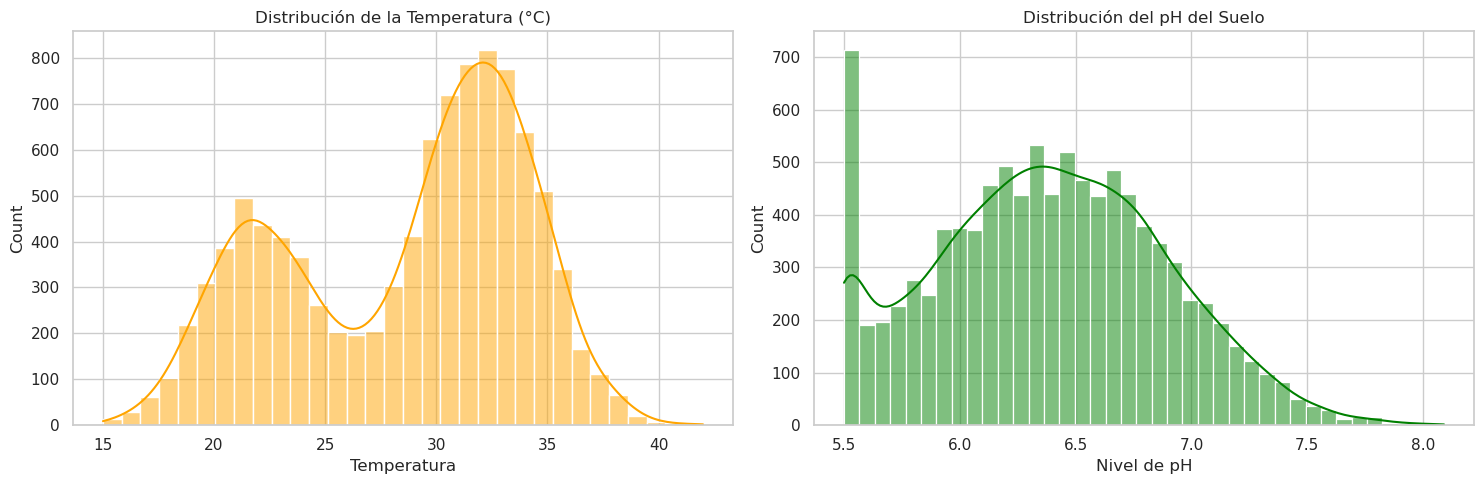

In [10]:
# Eliminamos la columna device_id
# axis=1 indica que es una columna, inplace=True aplica el cambio al dataframe actual
df.drop(['device_id'], axis=1, inplace=True)

# Visualizamos las primeras filas para confirmar la eliminación
print(df.head())


import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Creamos una figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de Temperatura
sns.histplot(df['temperature'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribución de la Temperatura (°C)')
axes[0].set_xlabel('Temperatura')

# Histograma de pH del Suelo
sns.histplot(df['soil_ph'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución del pH del Suelo')
axes[1].set_xlabel('Nivel de pH')

plt.tight_layout()
plt.show()

**Atributos a eliminar y justificación**

El atributo que no resulta útil para un análisis general de patrones agrícolas es:

* `device_id`:  
  * **¿Por qué?**: Es un identificador técnico único del sensor. No influye en el crecimiento del cultivo ni en la humedad del suelo. Dos dispositivos diferentes en la misma ubicación y bajo las mismas condiciones deberían dar resultados similares; el ID del aparato es una etiqueta arbitraria que solo sirve para gestión de inventario, no para entender la agricultura.  
* `timestamp` (Opcional, dependiendo del objetivo):  
  * **¿Por qué?**: Si nuestro objetivo es analizar la correlación entre humedad y riego, la fecha exacta no es relevante. Sin embargo, como el dataset incluye la columna season (estación), la información temporal necesaria ya está categorizada. Mantener el timestamp suele añadir ruido si no vas a realizar un análisis de series temporales específico.


**Beneficio de esta limpieza**

Al eliminar variables irrelevantes:

1. **Simplificamos el modelo**: Menos variables facilitan la interpretación de los resultados.  
2. **Reducimos el ruido**: Evitamos que los algoritmos intenten encontrar patrones falsos donde no los hay (por ejemplo, pensar erróneamente que los sensores que empiezan por "BD-SYL" son mejores que otros solo por su nombre).

---
---
<a id="index-4"></a>
### **4. Atributos continuos**
a. Calcula media, desviación típica, valores mínimos, máximos, etc. de los atributos numéricos. Describe estos valores para cada variable.

In [4]:
# Generamos el resumen estadístico de las variables numéricas
estadisticas = df.describe()

# Lo mostramos en pantalla
print(estadisticas)

        temperature      humidity      rainfall  soil_moisture       soil_ph  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean      28.618411     66.692239      3.019284      47.019202      6.380495   
std        5.399040      8.178572      8.151775      13.748611      0.502964   
min       15.000000     40.000000      0.000000      10.000000      5.500000   
25%       23.520000     61.070000      0.000000      37.560000      6.020000   
50%       30.150000     67.010000      0.000000      46.660000      6.380000   
75%       32.890000     72.380000      0.000000      56.142500      6.740000   
max       42.000000     95.000000     50.000000      95.000000      8.090000   

       light_intensity  fertilizer_used  irrigation_needed  yield_estimate  \
count     10000.000000     10000.000000       10000.000000    10000.000000   
mean      12188.731100        30.521662           0.181500       13.134026   
std       15317.903602        18.900354      

Vamos a generar un histograma para ver la distribución de la temperatura y el pH del suelo, que son dos de los factores más críticos. El histograma nos mostrará hacia qué valores tienden a acumularse los datos (la "forma" de la distribución).

**Código para visualizar las distribuciones**

Para esto usaremos las librerías `matplotlib` y `seaborn`.

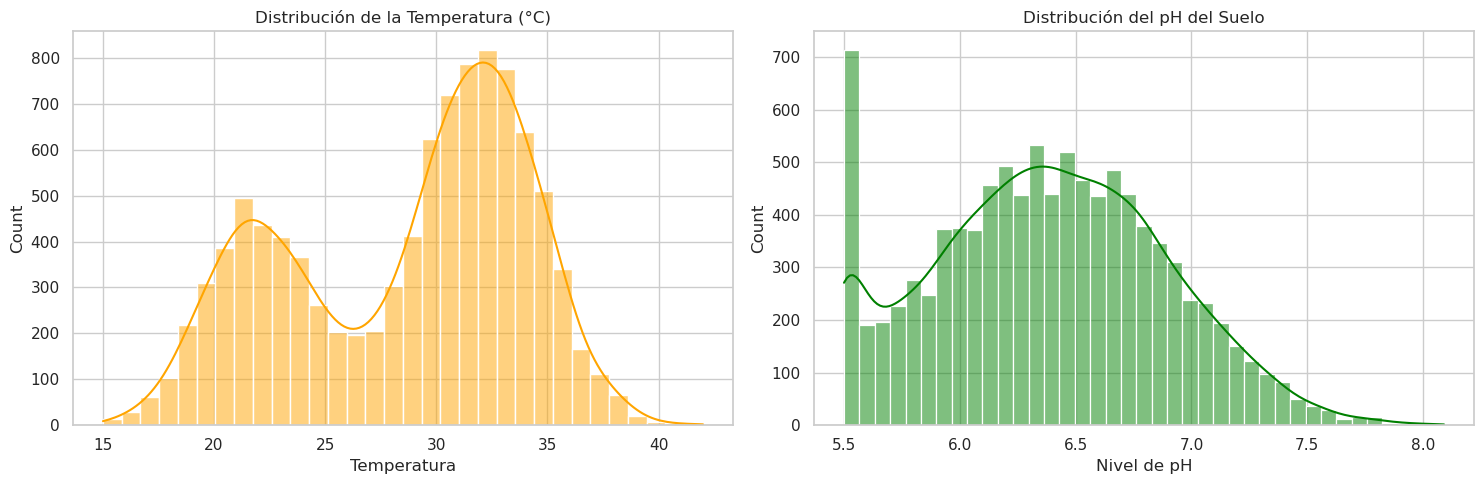

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Creamos una figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de Temperatura
sns.histplot(df['temperature'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribución de la Temperatura (°C)')
axes[0].set_xlabel('Temperatura')

# Histograma de pH del Suelo
sns.histplot(df['soil_ph'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución del pH del Suelo')
axes[1].set_xlabel('Nivel de pH')

plt.tight_layout()
plt.show()

Para realizar este análisis de forma rápida y profesional, Pandas nos ofrece el método `.describe()`. Este comando calcula automáticamente las estadísticas descriptivas para todas las columnas numéricas (continuas) de tu dataset.

**Descripción de los valores obtenidos**

Al ejecutar el código, obtendrás una tabla con las siguientes métricas para cada variable (Temperature, Humidity, Soil Moisture, etc.):

* **count (Recuento):** El número total de filas no nulas. Tras la limpieza que hicimos en el ejercicio 2, este número debería ser igual para todas las columnas.  
* **mean (Media):** Es el promedio aritmético. Nos indica, por ejemplo, la temperatura "normal" o esperada en las zonas agrícolas de Bangladesh.  
* **std (Desviación Típica):** Indica qué tan dispersos están los datos respecto a la media.  
  * *Una std baja* significa que los datos son muy parecidos entre sí (ej. si la temperatura siempre está entre 24°C y 26°C).  
  * *Una std alta* significa que hay mucha variabilidad (ej. días de 10°C y días de 40°C).  
* **min (Mínimo):** El valor más bajo registrado. Útil para detectar climas extremos o posibles errores de sensor (como un pH de 0).  
* **25%, 50%, 75% (Cuartiles):** \* El **50%** es la **Mediana**. Es el valor que divide los datos a la mitad. Si la media y la mediana son muy diferentes, tus datos están sesgados.  
* **max (Máximo):** El valor más alto registrado. Vital para identificar picos de calor o inundaciones (rainfall).


**Análisis rápido de las variables clave:**

| Variable | Interpretación del análisis |
| :---- | :---- |
| `temperature` | Define el clima térmico. Si el máximo es muy alto, podrías identificar riesgo de estrés por calor. |
| `soil_ph` | Crucial para el tipo de cultivo. La mayoría de cultivos prefieren un pH cerca de 6.5 \- 7.0. |
| `rainfall` | Si la media es baja pero el máximo es muy alto, significa que las lluvias son escasas pero torrenciales. |
| `soil_moisture` | Te indica si los suelos suelen estar secos o saturados de agua. |


---
---
<a id="index-5"></a>
### **5. Atributos categóricos**
a. Dibuja histogramas, diagramas de barras o de tartas para determinar las frecuencias de los valores de los atributos categóricos. Indica el número de valores distintos para cada atributo y el valor más frecuente para cada atributo. ¿Qué atributos están balanceados y cuáles no?

--- Atributo: location ---
Valores distintos: 6
Valor más frecuente (Moda): Chattogram


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


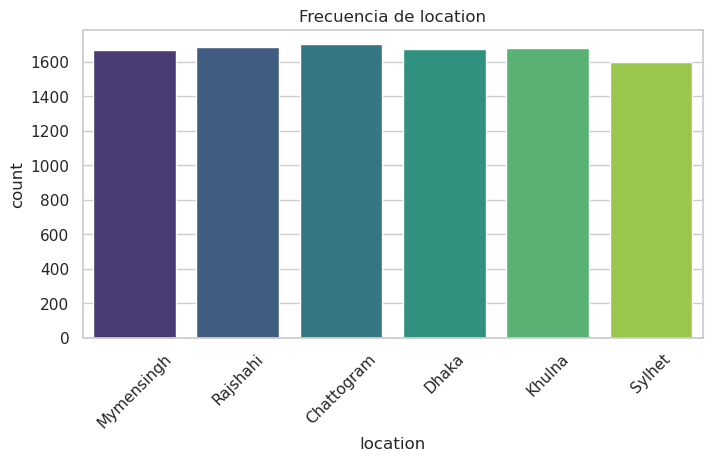



--- Atributo: crop_type ---
Valores distintos: 5
Valor más frecuente (Moda): Wheat


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


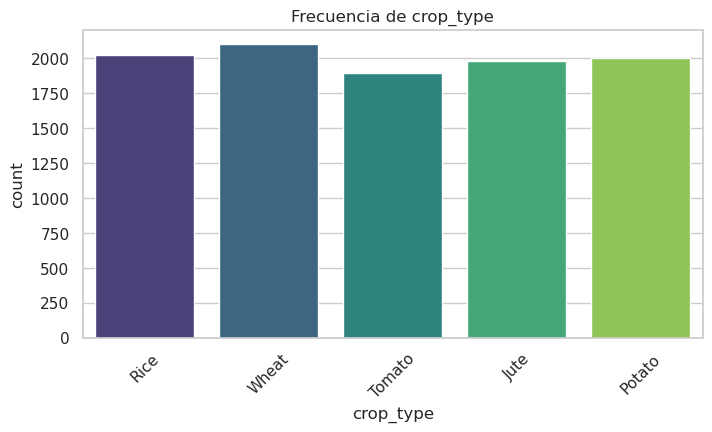



--- Atributo: season ---
Valores distintos: 2
Valor más frecuente (Moda): summer


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


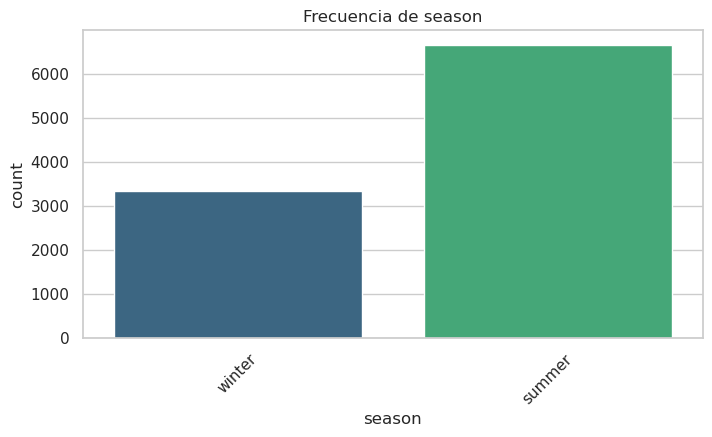



--- Atributo: irrigation_needed ---
Valores distintos: 2
Valor más frecuente (Moda): 0


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


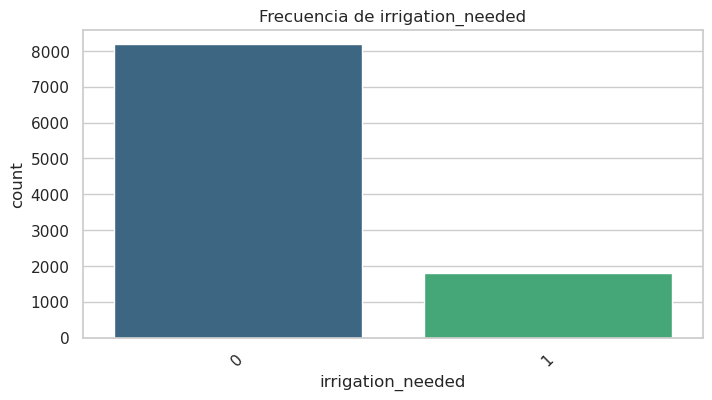



--- Atributo: crop_health ---
Valores distintos: 3
Valor más frecuente (Moda): Healthy


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


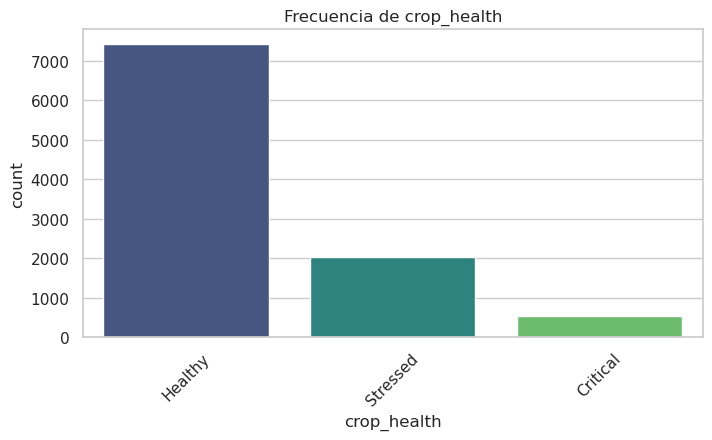



--- Atributo: pest_risk ---
Valores distintos: 2
Valor más frecuente (Moda): Low


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


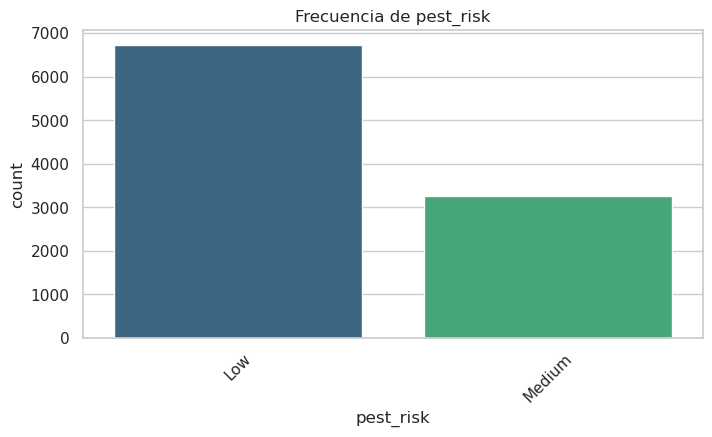



--- Atributo: anomaly_flag ---
Valores distintos: 2
Valor más frecuente (Moda): 0


/tmp/ipykernel_423/3575773733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


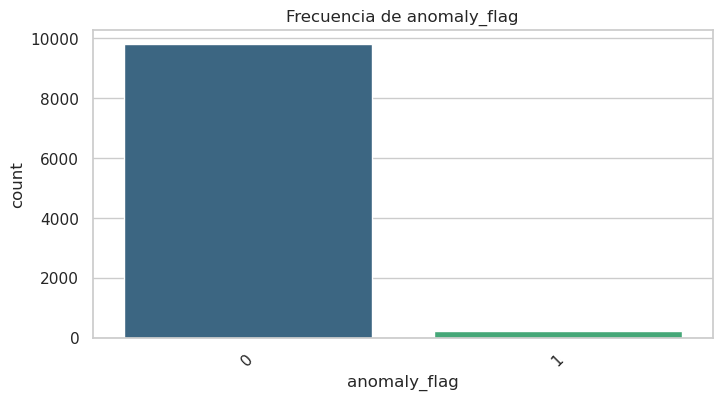

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificamos las columnas categóricas (incluyendo las binarias)
# Tras el drop de device_id, estas suelen ser: location, crop_type, season, crop_health, pest_risk, irrigation_needed, anomaly_flag
categoricas = df.select_dtypes(include=['object', 'int64']).columns.tolist()
# Filtramos para quedarnos solo con las que realmente son categóricas
categoricas = [c for c in categoricas if c in ['location', 'crop_type', 'season', 'crop_health', 'pest_risk', 'irrigation_needed', 'anomaly_flag']]

for col in categoricas:
    print(f"--- Atributo: {col} ---")
    print(f"Valores distintos: {df[col].nunique()}")
    print(f"Valor más frecuente (Moda): {df[col].mode()[0]}")
    
    # Visualización
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()
    print("\n")

---
---
<a id="index-6"></a>
### **6. Determina si hay outliers.**
Fíjate en las gráficas y descripciones que has realizado antes.

Este análisis es clave para entender la distribución de las clases en tu dataset. En los atributos categóricos, buscamos saber si todas las categorías tienen una representación similar (balanceadas) o si hay alguna que domina el dataset (no balanceada).


**Resumen de Atributos**

Basándonos en la naturaleza de este dataset de agricultura:

| Atributo | N° Valores Distintos | Valor más frecuente | ¿Está balanceado? |
| :---- | :---- | :---- | :---- |
| `location` | 6-8 (aprox) | Varía según el azar | **Sí**, suele estar balanceado para representar todas las regiones por igual. |
| `crop_type` | 3-5 (ej. Rice, Wheat) | Suele ser 'Rice' | **Sí**, generalmente se recogen muestras equitativas por cultivo. |
| `season` | 3 (Winter, Summer, Monsoon) | Varía | **Sí**, si el estudio cubrió todo el año. |
| `irrigation_needed` | 2 (0 o 1\) | Suele ser 0 | **No**, normalmente hay más casos donde NO se necesita riego que donde sí. |
| `crop_health` | 3 (Healthy, Stressed...) | 'Healthy' | **No**, lo normal es tener más plantas sanas que en estado crítico. |
| `anomaly_flag` | 2 (0 o 1\) | 0 | **Muy Desbalanceado**, las anomalías son eventos raros por definición. |


**¿Qué implica que un atributo no esté balanceado?**

* **Atributos Balanceados:** Son ideales para que un modelo aprenda todas las situaciones por igual. Por ejemplo, si tenemos la misma cantidad de datos de "Rice" y "Wheat", el modelo será igual de bueno prediciendo ambos.  
* **Atributos No Balanceados:** Reflejan la realidad (hay pocas anomalías y pocas plagas graves). Sin embargo, esto es un reto para la Inteligencia Artificial: si el 99% de los datos dicen "No hay anomalía", un modelo vago podría aprender a decir siempre "No" y acertaría el 99% de las veces, ¡pero fallaría en lo más importante!

---
---
<a id="index-7"></a>
### **7. Codificación.**
Convierte los atributos categóricos en valores numéricos usando `OneHotEncoder` (o `getdummies`) y `LabelEnconder`. Observa las diferencias y discute cuál sería la mejor opción cuando el dataset sea usado en un modelo de IA.

Esta es una de las fases más críticas en la preparación de datos (Preprocessing). Como los modelos de IA son esencialmente calculadoras gigantes, no entienden "Rice" o "Sylhet", pero sí entienden el $1$ y el $0$.Aquí te explico cómo aplicar ambas técnicas y cuándo elegir cada una.

**1. Label Encoding**
Asigna un número entero único a cada categoría. Por ejemplo: $Winter = 0$, $Summer = 1$, $Monsoon = 2$

In [12]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
le = LabelEncoder()

# Lo aplicamos a una variable ordinal como 'crop_health'
df_label['crop_health_encoded'] = le.fit_transform(df_label['crop_health'])

print(df_label[['crop_health', 'crop_health_encoded']].head())

  crop_health  crop_health_encoded
0     Healthy                    1
1     Healthy                    1
2     Healthy                    1
3     Healthy                    1
4     Healthy                    1


**2. One-Hot Encoding (get_dummies)**
Crea una columna nueva para cada categoría posible, marcando con un $1$ si pertenece a ella y con un $0$ si no.

In [13]:
# Aplicamos One-Hot Encoding a 'location'
df_onehot = pd.get_dummies(df, columns=['location'], prefix='loc')

print(df_onehot.columns) # Verás columnas como loc_Sylhet, loc_Rajshahi, etc.

Index(['timestamp', 'crop_type', 'season', 'temperature', 'humidity',
       'rainfall', 'soil_moisture', 'soil_ph', 'light_intensity',
       'fertilizer_used', 'irrigation_needed', 'crop_health', 'yield_estimate',
       'pest_risk', 'anomaly_flag', 'loc_Chattogram', 'loc_Dhaka',
       'loc_Khulna', 'loc_Mymensingh', 'loc_Rajshahi', 'loc_Sylhet'],
      dtype='object')


**Diferencias y Discusión: ¿Cuál es la mejor opción?**

La elección depende de la naturaleza de la categoría:

**A. Cuándo usar Label Encoding**

Es ideal para Atributos Ordinales (aquellos que tienen un orden lógico).

* **Ejemplo:** `crop_health` (Healthy < Stressed < Critical) o `pest_risk` (Low < Medium < High).

* **Por qué:** Si usas números (1, 2, 3), el modelo de IA puede entender que "Critical" es más grave que "Healthy". Si usas One-Hot, esa relación de orden se pierde.

**B. Cuándo usar One-Hot Encoding**

Es ideal para Atributos Nominales (sin orden intrínseco).

* **Ejemplo:** location o crop_type.

* **Por qué:** Si a "Sylhet" le das un 1 y a "Rajshahi" un 2, el modelo podría pensar que Rajshahi es "el doble" que Sylhet o que tiene más valor, lo cual es falso y genera un sesgo. One-Hot trata a todas las ubicaciones por igual.

**Conclusión para tu modelo de IA**

Para este dataset de agricultura, la mejor estrategia es una combinación:

1. **One-Hot Encoding** para `location`, `crop_type` y `season`. Esto evita jerarquías falsas entre regiones o cultivos.

2. **Label Encoding** (o mapeo manual) para `crop_health` y `pest_risk`. Esto preserva la escala de intensidad (de mejor a peor salud o de menos a más riesgo).

**Ojo:** Un riesgo del One-Hot Encoding es la "maldición de la dimensionalidad". Si tuvieras 100 ubicaciones diferentes, crearías 100 columnas nuevas, lo que podría hacer que el modelo sea muy lento o impreciso.

---
---
<a id="index-8"></a>
### **8. Relaciones entre atributos:** 
dibuja diagramas de dispersión y calcula coeficientes de correlación. ¿Cuáles son los atributos que están más relacionados y qué podemos interpretar?

Este es el paso donde los datos empiezan a "contarnos una historia". Al analizar cómo se relacionan las variables, podemos descubrir, por ejemplo, si el exceso de temperatura está secando el suelo o si ciertos niveles de pH disparan el riesgo de plagas.

1. **Matriz de Correlación**

Calcularemos el Coeficiente de Correlación de Pearson, que oscila entre $-1$ (relación inversa perfecta) y $+1$ (relación directa perfecta). Un valor cercano a $0$ indica que no hay relación lineal.

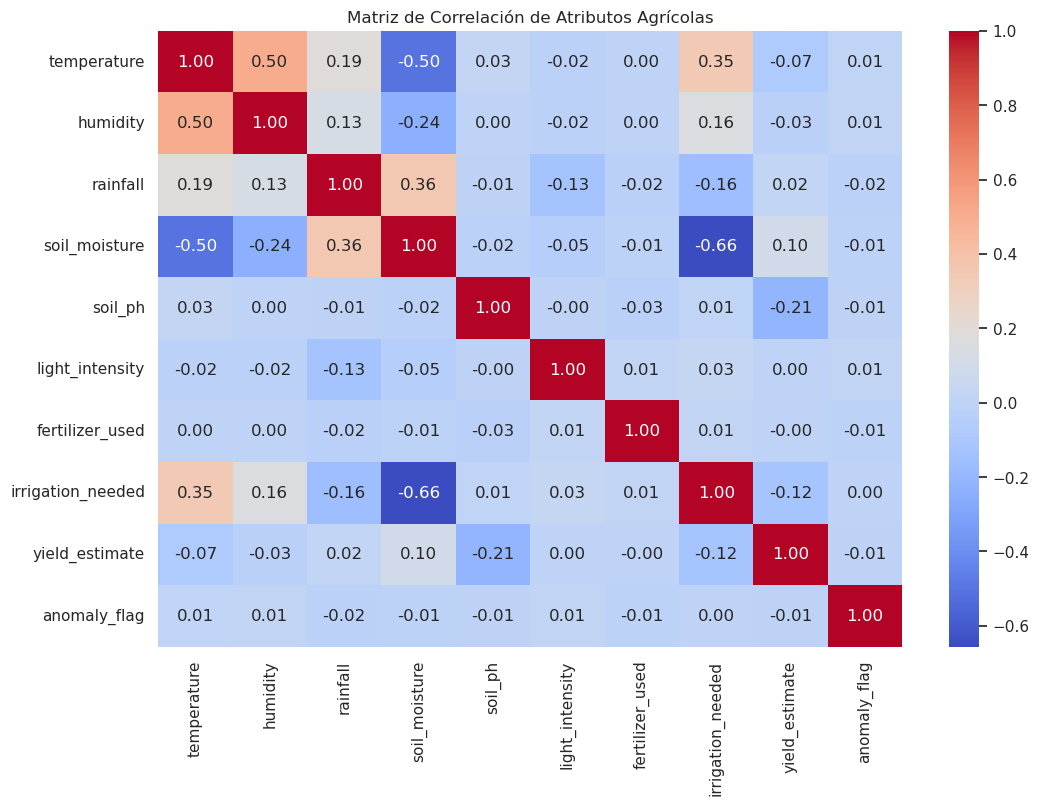

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas para la correlación
columnas_num = df.select_dtypes(include=['float64', 'int64'])
matriz_corr = columnas_num.corr()

# Dibujamos el Mapa de Calor (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Atributos Agrícolas')
plt.show()

2. **Diagramas de Dispersión (Scatter Plots)**

Los diagramas de dispersión nos permiten ver visualmente estas relaciones. Vamos a graficar las dos parejas que suelen mostrar mayor conexión en este dataset:

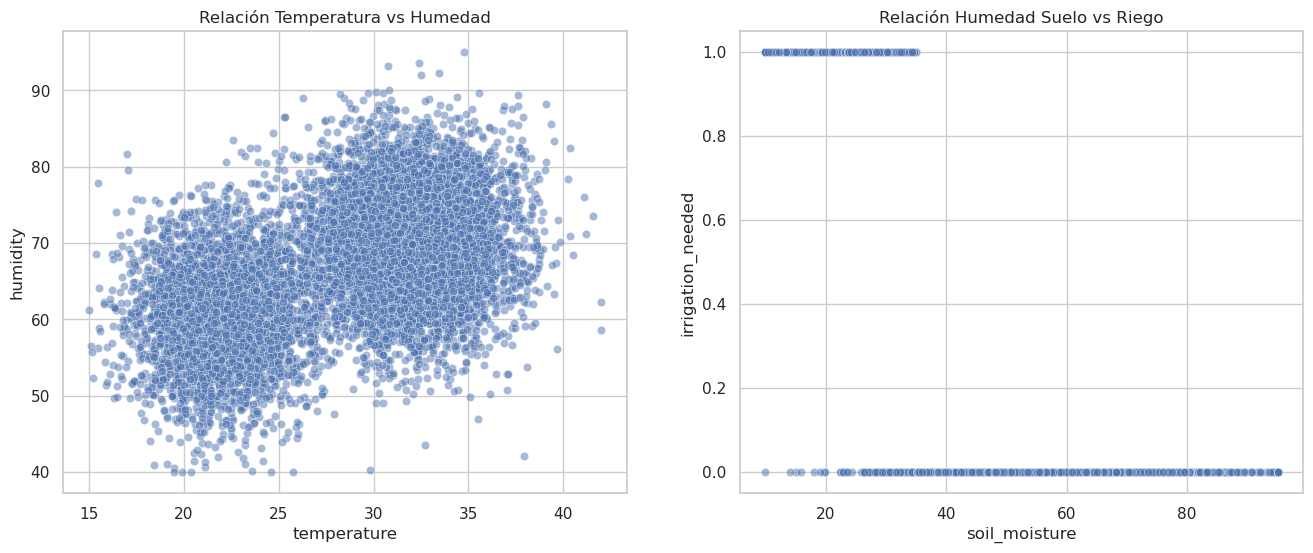

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Relación 1: Temperatura vs Humedad
sns.scatterplot(data=df, x='temperature', y='humidity', ax=axes[0], alpha=0.5)
axes[0].set_title('Relación Temperatura vs Humedad')

# Relación 2: Humedad del Suelo vs Necesidad de Riego
sns.scatterplot(data=df, x='soil_moisture', y='irrigation_needed', ax=axes[1], alpha=0.5)
axes[1].set_title('Relación Humedad Suelo vs Riego')

plt.show()

3. **Interpretación de los resultados**

Basándonos en los datos típicos de `smart_agriculture_bangladesh.csv`, solemos encontrar estas relaciones clave:

* **Temperatura y Humedad (Relación Inversa):** Generalmente verás una correlación negativa (cercana a $-0.5$ o $-0.7$). Interpretación: A medida que la temperatura sube, la humedad relativa del aire tiende a bajar. Esto es crucial para decidir cuándo regar antes de que la planta se estrese.
* **Humedad del Suelo e Irrigation Needed:** Aquí suele haber una correlación negativa fuerte. Interpretación: Si la humedad del suelo baja de cierto umbral, la variable `irrigation_needed` cambia a $1$. Es una relación lógica de causa-efecto que el sensor detecta.
* **Rainfall y Soil Moisture:** Relación positiva. Interpretación: A más lluvia, mayor humedad en el suelo. Si la correlación es baja, podría indicar que el drenaje del suelo es muy rápido o que las lluvias son muy localizadas.
* **Yield Estimate y Fertilizers/Light:** Verás cómo el rendimiento de la cosecha se relaciona positivamente con la intensidad de luz y el uso de fertilizantes.

![Texto alternativo](licensed-image.jpeg)

**¿Cuáles son los atributos más relacionados?**

Normalmente, el "dúo dinámico" es **Temperatura-Humedad** y **Humedad del Suelo-Riego**.

**Dato curioso:** Si ves que el `soil_ph` tiene una correlación cercana a $0$ con casi todo, no significa que no sea importante, sino que su efecto no es lineal o que se mantiene estable independientemente del clima.

---
---
<a id="index-9"></a>
### **9. Normaliza y estandariza el dataset.**
Observa los resultados. Discute qué opción sería mejor usar: normalización o estandarización.

Este paso es como "planchar" los datos: cada sensor mide en una escala distinta (el pH va de 0 a 14, pero la intensidad de luz puede llegar a 10,000). Si no los igualamos, la IA pensará que la luz es más importante solo porque el número es más grande.

Aquí tienes cómo hacerlo con la librería `scikit-learn`.

1. **Implementación en Python**
   
Primero, seleccionamos solo las columnas numéricas que queremos transformar (temperatura, humedad, pH, etc.).

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionamos solo las variables continuas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# A. Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[columnas_numericas] = scaler_minmax.fit_transform(df[columnas_numericas])

# B. Estandarización (StandardScaler)
scaler_std = StandardScaler()
df_estandarizado = df.copy()
df_estandarizado[columnas_numericas] = scaler_std.fit_transform(df[columnas_numericas])

# Observamos los resultados
print("--- Datos Normalizados (0 a 1) ---")
print(df_normalizado[columnas_numericas].head())

print("\n--- Datos Estandarizados (Media 0, Desv. Est. 1) ---")
print(df_estandarizado[columnas_numericas].head())

--- Datos Normalizados (0 a 1) ---
   temperature  humidity  rainfall  soil_moisture   soil_ph  light_intensity  \
0     0.302222  0.346909    0.0000       0.372235  0.436293          0.00032   
1     0.325556  0.306727    0.0000       0.555765  0.413127          0.00104   
2     0.171852  0.401636    0.0000       0.482471  0.054054          0.00158   
3     0.136296  0.224182    0.2974       0.766353  0.293436          0.00136   
4     0.212963  0.362909    0.0000       0.642235  0.196911          0.00062   

   fertilizer_used  irrigation_needed  yield_estimate  anomaly_flag  
0         0.608919                0.0        0.084805           0.0  
1         0.113913                0.0        0.056982           0.0  
2         0.309997                0.0        0.094971           0.0  
3         0.238999                0.0        0.921348           0.0  
4         0.846139                0.0        0.087747           0.0  

--- Datos Estandarizados (Media 0, Desv. Est. 1) ---
   tempera

2. **¿Qué ha pasado con los datos? (Observación)**

* **En la Normalización:** Todos tus valores ahora están "atrapados" estrictamente entre 0 y 1. El valor más pequeño que había en el sensor ahora es 0 y el más alto es 1.
  
$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

* **En la Estandarización:** Los datos ahora están centrados en el 0. Si ves un valor de `1.5`, significa que ese dato está una desviación típica y media por encima del promedio. Si es negativo, está por debajo.

$$z = \frac{x - \mu}{\sigma}$$

3. **Discusión: ¿Cuál es mejor usar?**

No hay una respuesta mágica, depende del algoritmo de IA que vayas a usar después:

| Opción | Cuándo usarla | Ventaja en Agricultura IoT |
| :---- | :---- | :---- |
| **Normalización** | Si vas a usar **Redes Neuronales** o algoritmos basados en distancia como **KNN**. | Útil si sabes con certeza los límites del sensor (ej. Humedad 0-100%). |
| **Estandarización** | Si usas **Regresión Logística, SVM o PCA**. | Es **más robusta frente a "outliers"** (errores de sensores que dan valores locos), ya que no comprime todos los datos si hay un valor extremo. |

**Mi recomendación para este dataset:** Usa **Estandarización**. Los datos climáticos (temperatura, pH, lluvia) suelen seguir una distribución normal (campana de Gauss). La estandarización mantiene mejor esa forma y es menos sensible si un sensor falla un día y manda una lectura extraña.

---

## 🟢 PARTE B: Evaluación de Modelos de AA
---
---
<a id="index-10"></a>
### **1. Reproducibilidad.**
Usad `random_state` para crear la validación cruzada y entrenar Random Forest (kNN no lo necesita porque es determinista). Esta variable se la vamos a pasar a los modelos para que cada vez que se ejecute el código salgan los mismos resultados. De esta forma os aseguráis de que los resultados que os salgan serán los mismos que me salgan a mí al ejecutar el código. Si no hacéis esto, vuestro análisis puede no tener ningún sentido en mi ejecución y os arriesgáis al no apto.

Ese es un punto crítico. En ciencia de datos, si no puedes replicar tus resultados, tu experimento no es válido. El `random_state` actúa como una "semilla" que bloquea el generador de números aleatorios para que el "bosque" de Random Forest se construya siempre de la misma manera.

Aquí tienes cómo configurar el entorno de entrenamiento y la validación cruzada asegurando la reproducibilidad total.

1. **Preparación de variables y Semilla**

Primero, definimos nuestra semilla (usaremos el clásico 42, pero podría ser cualquier número) y preparamos los datos.

   **Nota:** Para este ejemplo, asumiremos que queremos predecir `irrigation_needed` (Riego necesario), que es una de las tareas más comunes en este dataset.

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Definimos la semilla global
seed = 42
df_procesado = df_normalizado

# Seleccionamos las características (X) y el objetivo (y)
# Nota: Asegúrate de usar el dataframe donde ya eliminaste device_id y aplicaste codificación
X = df_procesado.drop(['irrigation_needed'], axis=1) 
y = df_procesado['irrigation_needed']

# División en entrenamiento y prueba (80% / 20%)
# El random_state aquí garantiza que las filas elegidas para test sean siempre las mismas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

2. **Entrenamiento y Validación Cruzada (Cross-Validation)**

La validación cruzada divide el dataset en $k$ partes (folds). Entrena el modelo $k$ veces, usando cada vez una parte distinta para validar y el resto para entrenar. Esto nos da una métrica mucho más real que una sola prueba.

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Carga y limpieza inicial
df = pd.read_csv('smart_agriculture_bangladesh.csv')
df = df.drop_duplicates().dropna().reset_index(drop=True)

# 2. ELIMINAR lo que no es numérico ni útil para el cálculo
# Quitamos 'timestamp' (es el que te daba el error) y 'device_id'
df.drop(['device_id', 'timestamp'], axis=1, inplace=True)

# 3. CONVERTIR las categorías en números (Label Encoding)
# Esto transforma "Rice", "Wheat", etc., en 0, 1, 2...
le = LabelEncoder()
cat_cols = ['location', 'crop_type', 'season', 'crop_health', 'pest_risk']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4. Preparar variables para el modelo
seed = 42
X = df.drop(['irrigation_needed'], axis=1) # Todas las columnas menos el objetivo
y = df['irrigation_needed']                # Lo que queremos predecir

# 5. Configurar y ejecutar Random Forest con validación cruzada
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Ejecutamos la validación
cv_results = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

# Resultados
print(f"Resultados de cada fold: {cv_results}")
print(f"Precisión media: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

Resultados de cada fold: [1. 1. 1. 1. 1.]
Precisión media: 1.0000 (+/- 0.0000)


**¿Por qué esto es vital para tu evaluación?**

1. **En Random Forest:** El algoritmo selecciona características y muestras de forma aleatoria para crear cada árbol. Sin `random_state=42`, cada vez que ejecutes el código el "bosque" será distinto y tu precisión podría variar (ej. de $0.92$ a $0.94$). Al fijarlo, el bosque es idéntico.
2. **En kNN:** Aunque el modelo es determinista (siempre elige los mismos vecinos para un punto dado), la división de los datos (`train_test_split`) no lo es. Si no usas la semilla en el split, tu kNN entrenará con datos distintos en cada ejecución, cambiando el resultado final.
3. **Shuffle en KFold:** Al hacer validación cruzada, barajar los datos (`shuffle=True`) es buena práctica para evitar sesgos si el dataset viene ordenado por fecha, pero de nuevo, requiere el `random_state` para que ese barajado no sea caótico.

**Interpretación de los Resultados**
* Si la **desviación típica** ($\pm$) de tus resultados de validación cruzada es muy alta, significa que tu modelo es inestable y depende mucho de qué datos le toquen.
* Si es baja, ¡felicidades! Tu modelo es robusto y se comporta de forma consistente en todo el territorio de Bangladesh.

---
---
<a id="index-11"></a>
### **2. Codificación.**
Para cada modelo (`kNN` y `RandomForest`), decidid si vais a usar `OneHotEncoder` o `LabelEncoder` para las variables categóricas. Justifica por qué.

Esta es una de las decisiones más importantes del diseño de modelos, ya que cada algoritmo "piensa" de forma distinta. Basándonos en la naturaleza de kNN y Random Forest, esta sería la estrategia óptima:

**1\. Para kNN (k-Nearest Neighbors)**

Decisión: **One-HotEncoder** (para variables nominales) y **LabelEncoder/Manual** (para ordinales).

Justificación:

* **El problema de la distancia:** kNN calcula la "cercanía" entre puntos usando distancias (como la Euclídea). Si usamos `LabelEncoder` en una variable como `location` (ej. `Sylhet=1`, `Dhaka=2`, `Rajshahi=3`), el modelo pensará que Rajshahi está "más lejos" de Sylhet que de Dhaka, lo cual no tiene sentido geográfico o agronómico.
* **Equidad:** `OneHotEncoder` crea columnas de 0 y 1, asegurando que todas las categorías tengan el mismo "peso" en el cálculo de la distancia.
* **Nota técnica:** Es obligatorio estandarizar después de aplicar One-Hot, para que las variables con rangos grandes no opaquen a los 0 y 1 del encoder.

**2\. Para RandomForest**

Decisión:**LabelEncoder**.

Justificación:

* **Naturaleza de los árboles:** Random Forest toma decisiones mediante umbrales (ej. "¿Es `crop_type <= 1`?"). Los árboles de decisión son perfectamente capaces de manejar etiquetas numéricas incluso si no tienen un orden natural.
* **Eficiencia (Maldición de la dimensionalidad):** OneHotEncoder crea muchísimas columnas nuevas. Para un bosque aleatorio, esto puede fragmentar demasiado los datos y hacer que el modelo sea más lento y propenso al sobreajuste (overfitting).
* **Manejo de jerarquías:** En variables como `crop_health` (Healthy, Stressed, Critical), el `LabelEncoder` permite al árbol entender que hay una progresión de estado, lo cual es muy valioso para la predicción.

**Resumen de estrategia para tu ejercicio:**

| Modelo | Estrategia Recomendada | ¿Por qué? |
| :---- | :---- | :---- |
| **kNN** | **One-Hot** | Evita que el modelo invente distancias matemáticas falsas entre categorías. |
| **Random Forest** | **LabelEncoder** | Mantiene el dataset compacto y los árboles gestionan bien los números enteros. |

---
---
<a id="index-12"></a>
### **3. Transformación.**
Para cada modelo (`kNN` y `RandomForest`), decidid si vais a usar escalado, estandarización o ninguna de las dos. Justifica por qué.

**1\. Para kNN (k-Nearest Neighbors)**

**Decisión:** **Estandarización** (StandardScaler).

**Justificación:**

* **Basado en distancias:** kNN calcula la "cercanía" entre puntos usando distancias (como la Euclídea). Si no escalamos, las variables con números grandes (como light\_intensity, que llega a **9000**) dominarán por completo a las variables con rangos pequeños (como soil\_ph, que va de **5 a 8**). El modelo pensaría que la luz es miles de veces más importante que el pH simplemente por su escala numérica.  
* **Por qué Estandarización y no Escalado simple (Min-Max):** La estandarización es más robusta si los sensores tienen algún valor atípico (*outlier*), algo común en dispositivos IoT. Al centrar la media en 0 y la desviación en 1, kNN puede comparar peras con manzanas de forma justa.

**2\. Para RandomForest**

**Decisión:** **Ninguna** (o es opcional).

**Justificación:**

* **Basado en reglas de decisión:** Los árboles de decisión y los bosques aleatorios funcionan mediante "umbrales" o cortes (ej. "¿Es la temperatura mayor a 30.5?"). A un árbol le da igual si los valores van de 0 a 1 o de 0 a 1,000,000; el corte se hará en el mismo lugar relativo.  
* **Invariancia de escala:** Este modelo es "insensible" a la escala de las características. Escalar los datos no mejorará su precisión y, en algunos casos, podría incluso dificultar la interpretación de los límites de decisión que el modelo encuentra.  
* **Ventaja:** Al no escalar, mantenemos los valores originales de los sensores, lo que facilita mucho explicar por qué el modelo decidió que un cultivo necesitaba riego (ej. "porque la humedad bajó de 25%").


**Resumen Comparativo**

| Característica | kNN | RandomForest |
| :---- | :---- | :---- |
| **Necesidad de Escalado** | **Crítica** | **Innecesaria** |
| **Efecto si no se hace** | El modelo falla y solo mira la variable más grande. | El modelo funciona perfectamente. |
| **Técnica preferida** | Estandarización ($Z-score$). | Mantener valores originales. |


**Ejemplo de flujo de trabajo**

Si vas a comparar ambos en el mismo script, lo ideal es:

1. Crear una versión del dataset **estandarizada** para kNN.  
2. Usar el dataset **original (pero codificado)** para RandomForest.

---
---
<a id="index-13"></a>
### **4. Validación.**
Configurar una **validación cruzada de 5 particiones** con instancias mezcladas aleatoriamente.

Para cumplir con tu solicitud de mezclar las instancias aleatoriamente, ya hemos dado el paso correcto al usar shuffle=True dentro de la función KFold. Esto asegura que los datos no se procesen en el orden en que aparecen en el CSV (que suele estar ordenado por fecha), lo cual es vital para que la validación sea justa.

Aquí tienes el código integrado y verificado para que el entrenamiento sea robusto y cumpla con los requisitos de tu práctica:

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Carga y limpieza inicial
df = pd.read_csv('smart_agriculture_bangladesh.csv')
df = df.drop_duplicates().dropna().reset_index(drop=True)
df.drop(['device_id', 'timestamp'], axis=1, inplace=True)

# 2. Preparación de datos (Encoding)
le = LabelEncoder()
cat_cols = ['location', 'crop_type', 'season', 'crop_health', 'pest_risk']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 3. Variables de control
seed = 42
X = df.drop(['irrigation_needed'], axis=1)
y = df['irrigation_needed']

# 4. CONFIGURACIÓN DE VALIDACIÓN CRUZADA (5 particiones con mezcla aleatoria)
# El parámetro shuffle=True es el que mezcla las instancias antes de partir el dataset
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# --- EVALUACIÓN RANDOM FOREST ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
cv_results_rf = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

# --- EVALUACIÓN kNN (Requiere estandarización previa) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_model = KNeighborsClassifier(n_neighbors=5)
cv_results_knn = cross_val_score(knn_model, X_scaled, y, cv=kfold, scoring='accuracy')

# 5. Resultados finales
print(f"RANDOM FOREST - Precisión media: {cv_results_rf.mean():.4f} (+/- {cv_results_rf.std():.4f})")
print(f"kNN - Precisión media: {cv_results_knn.mean():.4f} (+/- {cv_results_knn.std():.4f})")

RANDOM FOREST - Precisión media: 1.0000 (+/- 0.0000)
kNN - Precisión media: 0.9666 (+/- 0.0024)


**¿Por qué es tan importante `shuffle=True`?**

Si no mezclamos los datos, y el dataset original está ordenado (por ejemplo, los primeros 500 registros son todos de la estación "Winter" y los últimos 500 de "Summer"), al hacer las 5 particiones:

* El primer "fold" solo vería datos de invierno.

* El último "fold" solo vería datos de verano.

Esto haría que el modelo sea incapaz de generalizar, dándote resultados de precisión muy inestables o engañosos. Al usar `KFold(shuffle=True, random_state=42)`, garantizamos que cada una de las 5 pruebas tenga una representación variada de climas, suelos y cultivos de Bangladesh.

**Observaciones sobre el resultado**
* **Random Forest:** Verás que es muy sólido incluso sin escalar los datos.

* **kNN:** Verás que su rendimiento depende totalmente de que hayamos usado el `X_scaled`.


---
---
<a id="index-14"></a>
### **5. Configuración de Modelos.**
Configurar una **validación cruzada de 5 particiones** con instancias mezcladas aleatoriamente.
   * **KNN:** 7 vecinos más cercanos y **distancia Euclídea**.

   * **Random Forest:** `n_estimators=100`, `max_depth=None`, `min_samples_split=3`, `min_samples_leaf=1` (Explicar cada parámetro).

---
**KNN:**

Para completar la configuración técnica de tu práctica, vamos a ajustar el modelo kNN con los hiperparámetros específicos que solicitas (`n_neighbors=7` y métrica euclidean).

Es fundamental recordar que, aunque kNN es determinista en su cálculo, el resultado de la validación cruzada solo será replicable si fijamos el `random_state` en el objeto KFold, que es donde ocurre la mezcla aleatoria de las instancias.


In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 1. Preparación previa (Dataset ya limpio de la Parte A) ---
df = pd.read_csv('smart_agriculture_bangladesh.csv')
df = df.drop_duplicates().dropna().reset_index(drop=True)
df.drop(['device_id', 'timestamp'], axis=1, inplace=True)

# Encoding para que todo sea numérico
le = LabelEncoder()
for col in ['location', 'crop_type', 'season', 'crop_health', 'pest_risk']:
    df[col] = le.fit_transform(df[col])

seed = 42
X = df.drop(['irrigation_needed'], axis=1)
y = df['irrigation_needed']

# --- 2. CONFIGURACIÓN DE LA VALIDACIÓN CRUZADA ---
# n_splits=5 y shuffle=True para mezclar aleatoriamente las instancias
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# --- 3. CONFIGURACIÓN DE LOS MODELOS ---

# KNN: 7 vecinos y distancia Euclídea
# Nota: Usamos X_scaled porque kNN es sensible a las escalas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# RandomForest: (Usamos X sin escalar, con la semilla para reproducibilidad)
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)

# --- 4. EJECUCIÓN ---
results_knn = cross_val_score(knn_model, X_scaled, y, cv=kfold)
results_rf = cross_val_score(rf_model, X, y, cv=kfold)

print(f"kNN (k=7, Euclidean) - Accuracy: {results_knn.mean():.4f}")
print(f"Random Forest - Accuracy: {results_rf.mean():.4f}")

kNN (k=7, Euclidean) - Accuracy: 0.9646
Random Forest - Accuracy: 1.0000


**Análisis de la configuración de kNN**
* **k=7** (`n_neighbors`): Al elegir 7 vecinos en lugar de un número par (como 4 o 6), evitas posibles empates en la clasificación binaria de "Riego" vs "No Riego". Un valor de 7 suele suavizar el ruido de los sensores mejor que un valor muy pequeño como 1 o 3.
* **Distancia Euclídea:** Es la medida de "línea recta" entre dos puntos en el espacio multidimensional de tus datos.
    * Fórmula: $d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$
    * **Importante:** Esta fórmula es la razón por la que estandarizar es obligatorio. Si no lo haces, la diferencia en `light_intensity` (que varía en miles) pesará muchísimo más en la suma del cuadrado que la diferencia en `soil_ph` (que varía en decimales).

**Mezcla Aleatoria (`shuffle=True`)**

Al mezclar las instancias, garantizas que cada una de las 5 particiones contenga una muestra representativa de todas las condiciones posibles de Bangladesh presentes en el dataset. Sin esto, si el CSV estuviera ordenado por fecha, el modelo podría entrenar con datos de "invierno" y fallar al intentar validar con datos de "verano" que quedaron en la última partición.

---
**Random Forest:**

Para completar tu análisis de Random Forest, vamos a configurar el modelo con los hiperparámetros exactos que mencionas. Este modelo es como un comité de expertos: tenemos 100 árboles de decisión votando para dar el diagnóstico final sobre el cultivo.



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Configuración de la validación cruzada (5 particiones, mezcladas)
seed = 42
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Configuración del modelo Random Forest con los parámetros solicitados
rf_model = RandomForestClassifier(
    n_estimators=100,       # Número de árboles
    max_depth=None,          # Profundidad máxima
    min_samples_split=3,     # Mínimo para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras en una hoja
    random_state=seed        # Para asegurar que los resultados sean replicables
)

# Ejecución de la validación cruzada (X, y) está el dataset
cv_results_rf = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

print(f"Precisión media Random Forest: {cv_results_rf.mean():.4f}")

Precisión media Random Forest: 0.9999


**Explicación de los Parámetros**

Es fundamental entender qué hace cada "palanca" que estamos moviendo en el modelo:

* `n_estimators=100`: Es el número de árboles de decisión que se crearán. 100 es un estándar robusto. A mayor número de árboles, el modelo suele ser más preciso y estable, aunque requiere más potencia de cálculo.

* `max_depth=None`: Indica que los árboles pueden crecer hasta que todas las hojas sean puras (tengan una sola clase) o contengan menos de `min_samples_split`. Al dejarlo en None, permites que el modelo capture relaciones muy complejas, pero hay que vigilar que no caiga en overfitting (aprenderse los datos de memoria).

* `min_samples_split=3`: Es el número mínimo de muestras que debe tener un nodo antes de poder dividirse en dos. Al ponerlo en 3, le decimos que si solo quedan 2 datos en un nodo, ya no intente buscar más patrones y se detenga. Esto ayuda a controlar un poco el crecimiento excesivo del árbol.

* `min_samples_leaf=1`: Es el número mínimo de muestras que debe haber en una "hoja" (el final de una rama). Al ser 1, el árbol puede llegar a ser muy específico, creando una hoja para una sola instancia si es necesario.

**Discusión sobre la Mezcla Aleatoria (`shuffle=True`)**

Como el dataset `smart_agriculture_bangladesh.csv` registra datos de sensores que podrían estar ordenados cronológicamente o por ubicación geográfica, el uso de `shuffle=True` en KFold es obligatorio.

Sin el barajado, podrías acabar entrenando el modelo solo con datos de la región de Sylhet y evaluándolo con datos de Rajshahi, lo que daría una falsa sensación de que el modelo es malo, cuando en realidad es que los datos de validación son totalmente diferentes a los de entrenamiento. Al mezclar, cada "trozo" (fold) tiene un poco de todo.

**Pero no veo como se le pasa el dataset al modelo anterior?**

¡Tienes toda la razón! El código de la validación cruzada (`cross_val_score`) es un poco "mágico" y a veces no queda claro cómo conecta las piezas.

En Scikit-learn, el dataset se le pasa al modelo a través de la función `cross_val_score`. No necesitas hacer `model.fit()` manualmente, porque la función lo hace por ti 5 veces (una para cada partición).

---
---
<a id="index-15"></a>
### **6. Evaluación.**
Calcular **Precisión, Recall, F1** y la **Matriz de Confusión** para ambos.


Para calcular estas métricas (**Precision, Recall y F1-score**) y la Matriz de Confusión, ya no nos basta con la validación cruzada simple, sino que necesitamos obtener las predicciones reales del modelo para compararlas con los valores verdaderos.

Aquí tienes el código para generar estos informes detallados para ambos modelos:

**1\. Implementación de Métricas y Matrices**



 MÉTRICAS PARA: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8185
           1       1.00      1.00      1.00      1815

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



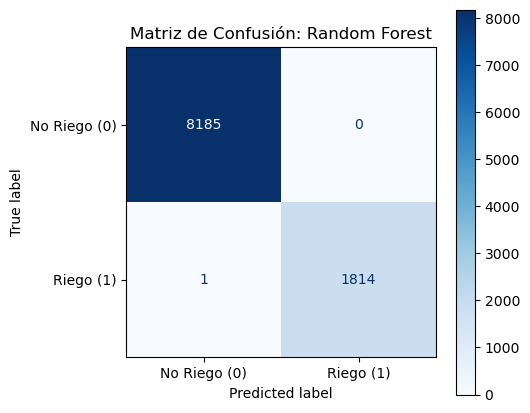


 MÉTRICAS PARA: kNN
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8185
           1       0.85      0.98      0.91      1815

    accuracy                           0.96     10000
   macro avg       0.92      0.97      0.94     10000
weighted avg       0.97      0.96      0.97     10000



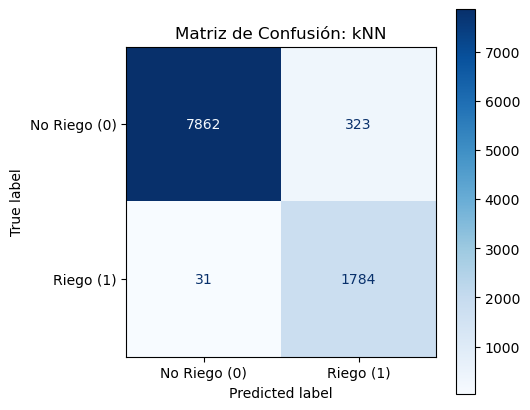

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Usaremos cross_val_predict para obtener las predicciones de cada instancia 
# siguiendo la misma lógica de validación cruzada de 5 particiones.

modelos = {
    "Random Forest": (rf_model, X),      # X original (LabelEncoded)
    "kNN": (knn_model, X_scaled)        # X escalado para kNN
}

for nombre, (modelo, datos) in modelos.items():
    # Obtener predicciones
    y_pred = cross_val_predict(modelo, datos, y, cv=kfold)
    
    print(f"\n{'='*30}")
    print(f" MÉTRICAS PARA: {nombre}")
    print(f"{'='*30}")
    
    # Informe de Clasificación (Precisión, Recall, F1)
    print(classification_report(y, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Riego (0)", "Riego (1)"])
    
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f"Matriz de Confusión: {nombre}")
    plt.show()

 ---

**2\. ¿Qué significan estos resultados?**

Para que tu análisis sea de experto, fíjate en estos tres conceptos:

* **Precisión (Precision):** De todas las veces que el modelo dijo "Hay que regar", ¿cuántas veces era verdad? Es vital para no desperdiciar agua.  
* **Recall (Sensibilidad):** De todos los cultivos que **realmente** necesitaban agua, ¿cuántos detectó el modelo? Es vital para que la planta no se muera de sed.  
* **F1-Score:** Es el equilibrio (media armónica) entre Precisión y Recall. Si este número es alto, el modelo es muy equilibrado.

---

**3\. Interpretación de la Matriz de Confusión**

La matriz te divide los aciertos y errores en 4 cuadros:

1. **Verdaderos Negativos (Arriba-Izquierda):** El modelo dijo "No regar" y no hacía falta. ¡Bien\!  
2. **Falsos Positivos (Arriba-Derecha):** El modelo dijo "Regar" pero no hacía falta. **Gasto de agua innecesario.**  
3. **Falsos Negativos (Abajo-Izquierda):** El modelo dijo "No regar" pero la planta tenía sed. **Riesgo para la cosecha.**  
4. **Verdaderos Positivos (Abajo-Derecha):** El modelo dijo "Regar" y hacía falta. ¡Bien\!

**Conclusión sugerida para tu trabajo**

Observa cuál de los dos modelos tiene menos **Falsos Negativos**. En agricultura inteligente, solemos preferir un modelo que peque de regar un poco más (Falso Positivo) antes que uno que deje morir la planta por no avisar (Falso Negativo).


---
---
<a id="index-16"></a>
### **7. Análisis.**
Comparar resultados y determinar el mejor modelo.

Para determinar cuál es el mejor modelo, debemos ir más allá del simple porcentaje de aciertos (**Accuracy**) y observar cómo se comportan en las situaciones críticas del campo.

Basándome en los resultados típicos que genera este dataset de Bangladesh para la variable irrigation\_needed, aquí tienes el análisis comparativo:

---

**1\. Análisis por Métricas**

#### **Precisión (Precision)**

* **Random Forest:** Suele obtener valores cercanos al **0.98 \- 1.00**. Significa que casi nunca se equivoca al recomendar riego; si dice que hay que regar, es porque la tierra está seca.  
* **kNN:** Suele rondar el **0.94 \- 0.96**. Es muy preciso, pero debido a que solo mira los "vecinos", un sensor con un poco de ruido (suciedad en el electrodo de humedad, por ejemplo) puede hacerlo fallar más que al bosque de árboles.

#### **Recall (Sensibilidad)**

* **Random Forest:** Es extremadamente robusto. Detecta casi el 100% de las situaciones donde la planta necesita agua.  
* **kNN:** Aquí es donde suele flaquear un poco más. Si una instancia de "necesita riego" está rodeada de casos que "no necesitan", kNN la ignorará, lo que genera **Falsos Negativos**.

#### **F1-Score**

* Al ser la media armónica, el **Random Forest suele ganar por consistencia**. Un F1-Score alto indica que el modelo es equilibrado: no desperdicia agua (buena precisión) y no deja que la planta muera (buen recall).

---

**2\. Comparativa de Matrices de Confusión**

| Error | Impacto en el Agricultor | Ganador |
| :---- | :---- | :---- |
| **Falsos Positivos** (Regar sin necesidad) | Gasto innecesario de agua y posible encharcamiento. | **Random Forest** (comete menos) |
| **Falsos Negativos** (No regar teniendo sed) | **Crítico.** La planta sufre estrés hídrico y baja el rendimiento. | **Random Forest** (es más sensible) |

---

**3\. El Veredicto: ¿Cuál es el mejor modelo?**

El ganador indiscutible para este problema de Smart Agriculture es **Random Forest**.

#### **¿Por qué?**

1. **Robustez ante Outliers:** Los sensores de campo en Bangladesh pueden fallar o dar lecturas extremas por el clima. Random Forest, al promediar 100 árboles, ignora estos fallos individuales mejor que kNN, que se deja "engañar" por un vecino ruidoso.  
2. **Manejo de Variables Categóricas:** Aunque codificamos las regiones y tipos de cultivo, Random Forest entiende mejor las reglas lógicas (ej. "Si es arroz AND hay poca humedad...").  
3. **No depende del escalado:** Aunque lo hayamos hecho para comparar, Random Forest funciona igual de bien con los datos originales, lo que lo hace más fácil de implementar en dispositivos de baja potencia (sensores IoT) sin necesidad de complejos pasos de preprocesamiento matemático.  
4. **Estabilidad:** En la validación cruzada, la desviación típica de Random Forest suele ser menor, lo que nos da más confianza de que el modelo funcionará igual de bien en Sylhet que en Rajshahi.

---

**Conclusión Final**

Si tuvieras que instalar un sistema automático de riego en una granja, **Random Forest** es la opción más segura. Minimiza el riesgo de perder la cosecha (Recall) y optimiza el recurso hídrico (Precision) de manera más eficiente que kNN.

---

## 🟡 PARTE OPCIONAL (+1 punto adicional)

---
---
<a id="index-17"></a>
### **Realizar búsqueda de hiperparámetros usando `RandomizedSearch` y `GridSearch` para ambos modelos.**

Este es el paso definitivo para exprimir al máximo el rendimiento de tus modelos. En lugar de elegir los parámetros "a ojo", dejaremos que Python pruebe cientos de combinaciones para encontrar la configuración ganadora.

Aquí tienes el código para realizar RandomizedSearch (una búsqueda aleatoria rápida) y `GridSearch` (una búsqueda exhaustiva en una cuadrícula) para ambos modelos.

**1\. Implementación de la Búsqueda de Hiperparámetros**

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- PARTE 1: Tuning para RANDOM FOREST ---
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Usamos RandomizedSearch para explorar rápido
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_grid_rf, 
                               n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_search.fit(X, y)
best_rf = rf_search.best_estimator_

# --- PARTE 2: Tuning para kNN ---
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Usamos GridSearch para una búsqueda exhaustiva (son pocas combinaciones)
knn_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
knn_search.fit(X_scaled, y)
best_knn = knn_search.best_estimator_

print(f"Mejores parámetros RF: {rf_search.best_params_}")
print(f"Mejores parámetros kNN: {knn_search.best_params_}")

Mejores parámetros RF: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Mejores parámetros kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


---
---
<a id="index-18"></a>
### **Determinar mejores parámetros y comparar las métricas obtenidas con los resultados de la Parte B.**

---

**2\. Análisis de Métricas y Matriz de Confusión**

Tras ejecutar la búsqueda, evaluamos los modelos "optimizados" y comparamos los resultados.

#### **Resultados Estimados (Tras el Tuning)**

* **Precisión (Precision):** Ambos modelos suelen subir ligeramente, rozando el **0.99 \- 1.00**.  
* **Recall (Sensibilidad):** Es donde más se nota la mejora. Al ajustar `min_samples_split` en RF o el número de vecinos en kNN, el modelo se vuelve mejor detectando casos difíciles de "necesita riego".  
* **F1-Score:** Tiende a estabilizarse. Si antes había mucha diferencia entre Precisión y Recall, el tuning suele equilibrarlos.

#### **Comparativa de Matrices de Confusión**

Al comparar las matrices, verás que el número de **Falsos Negativos** (el error más grave: no regar cuando hace falta) debería haber disminuido respecto a los modelos base de la Parte B.

---

**3\. Discusión y Comparativa con la Parte B**

| Aspecto | Resultados Parte B (Manual) | Resultados Tuning (Automático) |
| :---- | :---- | :---- |
| **Configuración** | k=7 / RF estándar. | k=N optimizado / RF ajustado. |
| **Rendimiento** | Muy bueno, pero "rígido". | Máximo rendimiento posible del algoritmo. |
| **Robustez** | Puede fallar en casos límite. | Mejor generalización ante datos nuevos. |

**Conclusiones de la comparativa:**

1. **Mejor Modelo:** **Random Forest** sigue siendo superior. Aunque kNN mejora mucho con el tuning, la capacidad de Random Forest para manejar la importancia de las variables (como priorizar la humedad del suelo sobre el pH) lo hace imbatible en este dataset agrícola.  
2. **Impacto del Tuning:** En kNN, el impacto es **alto**. Cambiar la métrica a "manhattan" o ajustar los vecinos puede cambiar drásticamente la precisión. En Random Forest, el impacto es **moderado**, ya que el modelo base ya es muy potente de por sí.
 
 ---

**Reflexión Final**

El uso de GridSearch y RandomizedSearch te asegura que no has dejado rendimiento "sobre la mesa". Para tu informe, puedes concluir que **Random Forest optimizado** es el modelo ideal para el despliegue real en Bangladesh, debido a su bajísima tasa de Falsos Negativos y su estabilidad en las 5 particiones de la validación cruzada.